# **Final Project Data Analysis**

In [ ]:
# importing libraries
!pip install pyshp six cartopy geopandas fiona pyproj descartes pysal rtree pykdtree pyepsg pillow OWSLib geoplot
!pip install -U -q geopandas tdqm folium mapclassify folium

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import statsmodels.formula.api as smf

from plotnine import *
%matplotlib inline

import requests
import uuid
from datetime import date, datetime, timedelta

!pip install -q langdetect
import pandas as pd
import langdetect
import re
from bs4 import BeautifulSoup

import geopandas as gpd
import geoplot
import geoplot.crs as gcrs

#connecting to the database
!sudo pip3 install -U -q PyMySQL sqlalchemy sql_magic
from sqlalchemy import create_engine
from sqlalchemy import text

conn_string = "mysql+pymysql://{user}:{password}@{host}/".format(
    host="db.ipeirotis.org", user="student", password="dwdstudent2015", db="public"
)

engine = create_engine(conn_string)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.1/221.1 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

**Getting US Census and EPA Data From SQL and Making Dataframes**

In [ ]:
#census data from db
sql = '''
select * from public.GroupI_CensusData
'''

with engine.connect() as connection:
  census_data = pd.read_sql(text(sql), con=connection)

census_data.head()

,Name,MedianHouseholdIncome,StateCode,CountyCode,TotalPopulation,White,Black,NativeAmerican,Asian,PacificIslander,OtherRace,MultipleRace,WhiteNonHispanic,Hispanic,PopulationUnemployed,PopulationPoverty,MedianRent
0,"Autauga County, Alabama",62660,01,001,58239,43755,11470,98,647,0,196,2073,42571,1775,752,7847,870
1,"Baldwin County, Alabama",64346,01,003,227131,192034,19895,1259,2175,9,4163,7596,187548,10634,3994,20598,892
2,"Barbour County, Alabama",36422,01,005,25259,11495,11985,77,106,1,977,618,11268,1176,808,5890,411
3,"Bibb County, Alabama",54277,01,007,22412,17020,5003,21,46,0,21,301,16596,634,884,3558,425
4,"Blount County, Alabama",52830,01,009,58884,54439,760,189,216,74,1243,1963,50595,5612,1554,7720,480


In [ ]:
#carbon monoxide data from db
sql = '''
select StateCode, CountyCode, Avg(Mean) as mean_per_county
from public.GroupI_EPACM
where SampleDuration like '8%'
and Mean >= 0
group by 1,2
'''

with engine.connect() as connection:
  cm_data = pd.read_sql(text(sql), con=connection)

cm_data

,StateCode,CountyCode,mean_per_county
0,18,163,0.049458
1,56,021,0.065416
2,28,049,0.067771
3,17,019,0.068212
4,72,021,0.072652
...,...,...,...
148,48,453,0.439334
149,34,017,0.447985
150,12,031,0.459725
151,72,113,0.480299


In [ ]:
#nitrogen dioxide data from db
sql = '''
select StateCode, CountyCode, Avg(Mean) as mean_per_county
from public.GroupI_EPAND
where SampleDuration like '1%'
group by 1,2
'''

with engine.connect() as connection:
  nd_data = pd.read_sql(text(sql), con=connection)

nd_data

,StateCode,CountyCode,mean_per_county
0,46,071,0.417965
1,56,013,2.573387
2,56,035,2.021060
3,30,027,1.477484
4,06,083,2.084591
...,...,...,...
251,51,059,21.678209
252,34,003,21.958352
253,13,121,20.630654
254,08,001,25.578064


In [ ]:
#ozone data from db
sql = '''
select StateCode, CountyCode, Avg(Mean) as mean_per_county
from public.GroupI_EPAozone
where SampleDuration like '8%'
group by 1,2
'''

with engine.connect() as connection:
  ozone_data = pd.read_sql(text(sql), con=connection)

ozone_data

,StateCode,CountyCode,mean_per_county
0,72,021,0.019050
1,72,097,0.019139
2,05,113,0.020151
3,06,023,0.022995
4,06,001,0.031292
...,...,...,...
755,08,059,0.050386
756,06,057,0.050630
757,48,381,0.050784
758,06,107,0.053369


In [ ]:
#particulate matter data from db
sql = '''
select StateCode, CountyCode, Avg(Mean) as mean_per_county
from public.GroupI_EPAPM
where SampleDuration like '24%'
group by 1,2
'''

with engine.connect() as connection:
  pm_data = pd.read_sql(text(sql), con=connection)

pm_data

,StateCode,CountyCode,mean_per_county
0,56,013,3.242075
1,27,031,1.187879
2,27,017,1.348406
3,23,009,3.065415
4,46,065,1.918232
...,...,...,...
622,06,099,12.210818
623,02,090,12.635477
624,13,303,11.322376
625,40,105,11.967816


In [ ]:
#sulfur dioxide data from db
sql = '''
select StateCode, CountyCode, Avg(Mean) as mean_per_county
from public.GroupI_EPASD
where SampleDuration like '24%'
and Mean >= 0
group by 1,2
'''
#where SampleDuration like '1%'

with engine.connect() as connection:
  sd_data = pd.read_sql(text(sql), con=connection)

sd_data

,StateCode,CountyCode,mean_per_county
0,15,001,1.826473
1,06,083,0.326428
2,72,033,0.000429
3,40,109,0.000826
4,34,001,0.002762
...,...,...,...
284,51,071,2.724719
285,48,233,2.909296
286,12,107,3.060694
287,16,005,3.704749


In [ ]:
#converting race to a % of population

census_data['white_pct'] = census_data['White']/census_data['TotalPopulation']
census_data['black_pct'] = census_data['Black']/census_data['TotalPopulation']
census_data['na_pct'] = census_data['NativeAmerican']/census_data['TotalPopulation']
census_data['asian_pct'] = census_data['Asian']/census_data['TotalPopulation']
census_data['pi_pct'] = census_data['PacificIslander']/census_data['TotalPopulation']
census_data['other_pct'] = census_data['OtherRace']/census_data['TotalPopulation']
census_data['multiple_pct'] = census_data['MultipleRace']/census_data['TotalPopulation']
census_data['white_nh_pct'] = census_data['WhiteNonHispanic']/census_data['TotalPopulation']
census_data['hispanic_pct'] = census_data['Hispanic']/census_data['TotalPopulation']

#converting unemployment and poverty to a % of population
census_data['unemp_pct'] = census_data['PopulationUnemployed']/census_data['TotalPopulation']
census_data['pov_pct'] = census_data['PopulationPoverty']/census_data['TotalPopulation']


In [ ]:
#filtering columns needed
census_data_pct = census_data[['StateCode','CountyCode','TotalPopulation','MedianHouseholdIncome','white_pct','black_pct','na_pct','asian_pct','pi_pct','other_pct','multiple_pct','white_nh_pct','hispanic_pct','unemp_pct','pov_pct']]
census_data_pct

,StateCode,CountyCode,TotalPopulation,MedianHouseholdIncome,white_pct,black_pct,na_pct,asian_pct,pi_pct,other_pct,multiple_pct,white_nh_pct,hispanic_pct,unemp_pct,pov_pct
0,01,001,58239,62660,0.751301,0.196947,0.001683,0.011109,0.000000,0.003365,0.035595,0.730971,0.030478,0.012912,0.134738
1,01,003,227131,64346,0.845477,0.087593,0.005543,0.009576,0.000040,0.018329,0.033443,0.825726,0.046819,0.017585,0.090688
2,01,005,25259,36422,0.455085,0.474484,0.003048,0.004197,0.000040,0.038679,0.024467,0.446098,0.046558,0.031989,0.233184
3,01,007,22412,54277,0.759415,0.223229,0.000937,0.002052,0.000000,0.000937,0.013430,0.740496,0.028288,0.039443,0.158754
4,01,009,58884,52830,0.924513,0.012907,0.003210,0.003668,0.001257,0.021109,0.033337,0.859232,0.095306,0.026391,0.131105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,72,145,54544,21507,0.562665,0.044166,0.000917,0.000165,0.000000,0.158551,0.233536,0.020002,0.977431,0.063838,0.431211
3217,72,147,8317,14942,0.311651,0.075628,0.000000,0.001683,0.000000,0.573043,0.037994,0.061200,0.921246,0.043044,0.532043
3218,72,149,22341,20722,0.470077,0.079853,0.000000,0.000000,0.000000,0.105233,0.344837,0.002328,0.996330,0.065530,0.442281
3219,72,151,31047,17267,0.102747,0.519181,0.000000,0.000354,0.000000,0.350726,0.026991,0.000870,0.998776,0.048507,0.526138


In [ ]:
#merging census + carbon monoxide
census_cm = pd.merge(census_data_pct, cm_data, on = ['StateCode', 'CountyCode'], how = 'left')
census_cm

,StateCode,CountyCode,TotalPopulation,MedianHouseholdIncome,white_pct,black_pct,na_pct,asian_pct,pi_pct,other_pct,multiple_pct,white_nh_pct,hispanic_pct,unemp_pct,pov_pct,mean_per_county
0,01,001,58239,62660,0.751301,0.196947,0.001683,0.011109,0.000000,0.003365,0.035595,0.730971,0.030478,0.012912,0.134738,NaN
1,01,003,227131,64346,0.845477,0.087593,0.005543,0.009576,0.000040,0.018329,0.033443,0.825726,0.046819,0.017585,0.090688,NaN
2,01,005,25259,36422,0.455085,0.474484,0.003048,0.004197,0.000040,0.038679,0.024467,0.446098,0.046558,0.031989,0.233184,NaN
3,01,007,22412,54277,0.759415,0.223229,0.000937,0.002052,0.000000,0.000937,0.013430,0.740496,0.028288,0.039443,0.158754,NaN
4,01,009,58884,52830,0.924513,0.012907,0.003210,0.003668,0.001257,0.021109,0.033337,0.859232,0.095306,0.026391,0.131105,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,72,145,54544,21507,0.562665,0.044166,0.000917,0.000165,0.000000,0.158551,0.233536,0.020002,0.977431,0.063838,0.431211,NaN
3217,72,147,8317,14942,0.311651,0.075628,0.000000,0.001683,0.000000,0.573043,0.037994,0.061200,0.921246,0.043044,0.532043,NaN
3218,72,149,22341,20722,0.470077,0.079853,0.000000,0.000000,0.000000,0.105233,0.344837,0.002328,0.996330,0.065530,0.442281,NaN
3219,72,151,31047,17267,0.102747,0.519181,0.000000,0.000354,0.000000,0.350726,0.026991,0.000870,0.998776,0.048507,0.526138,NaN


In [ ]:
#dropping null values
census_cm_drop = census_cm.dropna()
census_cm_drop

,StateCode,CountyCode,TotalPopulation,MedianHouseholdIncome,white_pct,black_pct,na_pct,asian_pct,pi_pct,other_pct,multiple_pct,white_nh_pct,hispanic_pct,unemp_pct,pov_pct,mean_per_county
36,01,073,672550,58330,0.508746,0.428732,0.001575,0.016861,0.000229,0.017854,0.026003,0.491865,0.040504,0.029729,0.155496,0.214251
69,02,020,292545,88871,0.602571,0.053558,0.072297,0.096871,0.029288,0.027216,0.118201,0.561319,0.094970,0.028102,0.089497,0.339537
76,02,090,97149,78321,0.729683,0.045579,0.075822,0.033649,0.005847,0.016706,0.092713,0.683692,0.082512,0.029223,0.061174,0.262057
104,04,013,4367186,72944,0.704671,0.056246,0.018823,0.042280,0.002101,0.070274,0.105605,0.537628,0.315259,0.025526,0.118830,0.304148
107,04,019,1035063,59215,0.695918,0.034431,0.036033,0.028423,0.001497,0.091722,0.111977,0.503871,0.380034,0.029583,0.147195,0.228517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,56,021,99905,71550,0.862409,0.023963,0.009509,0.011291,0.000571,0.031300,0.060958,0.773205,0.152965,0.019839,0.088334,0.065416
3139,56,039,23319,94498,0.852224,0.007119,0.001287,0.015824,0.000643,0.093915,0.028989,0.799262,0.149406,0.015781,0.070929,0.104890
3153,72,021,185939,27812,0.487434,0.073417,0.000947,0.001527,0.000000,0.183635,0.253040,0.005916,0.989206,0.043740,0.328543,0.072652
3155,72,025,128182,27062,0.623949,0.089958,0.003230,0.003269,0.000000,0.176998,0.102596,0.012771,0.981339,0.046613,0.373274,0.242331


**Finding Correlations Between Pollutants and Census Data**

<ipython-input-12-72d343ebce77>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

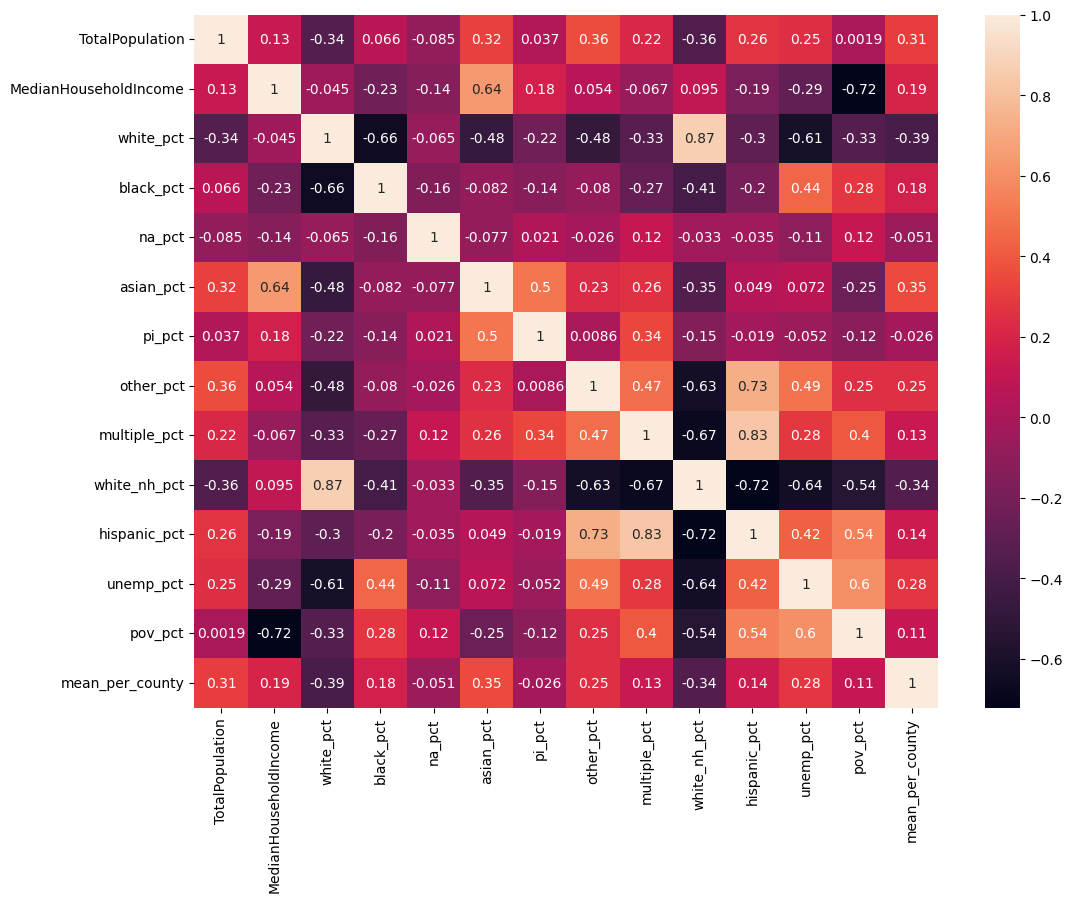

In [ ]:
#correlation between census data & carbon monoxide
plt.figure(figsize=(12,9))
sns.heatmap(census_cm_drop.corr(), annot=True)

<ipython-input-13-c30ddf9e1dfb>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

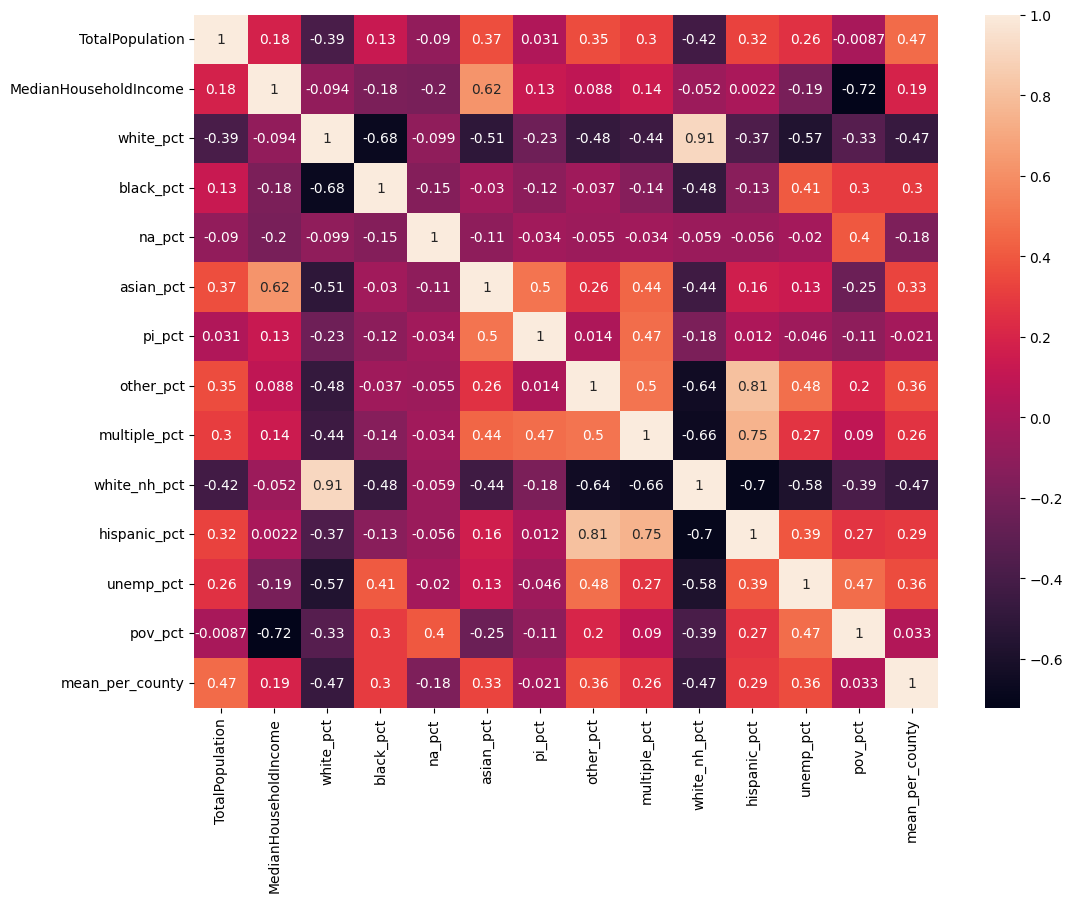

In [ ]:
#merging census + nitrogen dioxide
census_nd = pd.merge(census_data_pct, nd_data, on = ['StateCode', 'CountyCode'], how = 'left')
census_nd_drop = census_nd.dropna()

#checking correlation
plt.figure(figsize=(12,9))
sns.heatmap(census_nd_drop.corr(), annot=True)

<ipython-input-14-76d4f44e3ad7>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

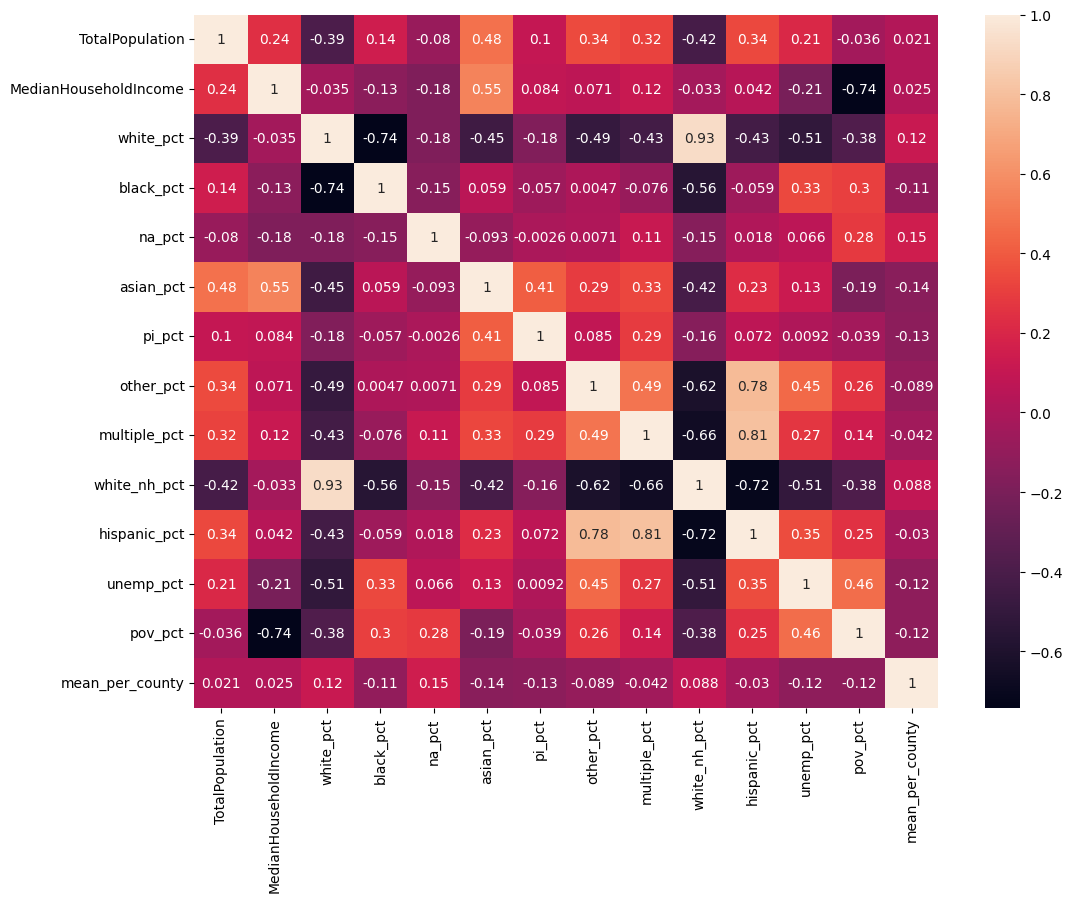

In [ ]:
#merging census + ozone
census_oz = pd.merge(census_data_pct, ozone_data, on = ['StateCode', 'CountyCode'], how = 'left')
census_oz_drop = census_oz.dropna()

#checking correlation
plt.figure(figsize=(12,9))
sns.heatmap(census_oz_drop.corr(), annot=True)

<ipython-input-15-f9905ba797ed>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

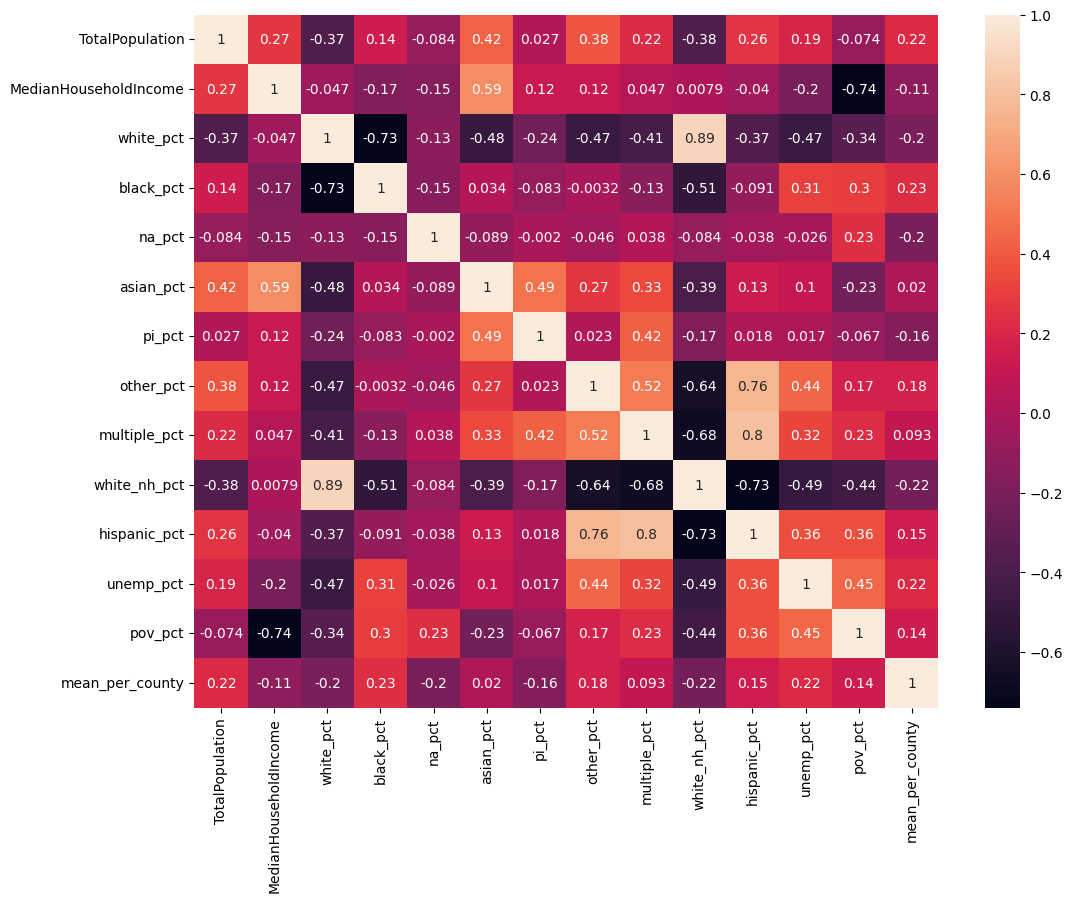

In [ ]:
#merging census + particulate matter
census_pm = pd.merge(census_data_pct, pm_data, on = ['StateCode', 'CountyCode'], how = 'left')
census_pm_drop = census_pm.dropna()

#checking correlation
plt.figure(figsize=(12,9))
sns.heatmap(census_pm_drop.corr(), annot=True)

<ipython-input-16-28e975dcf466>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

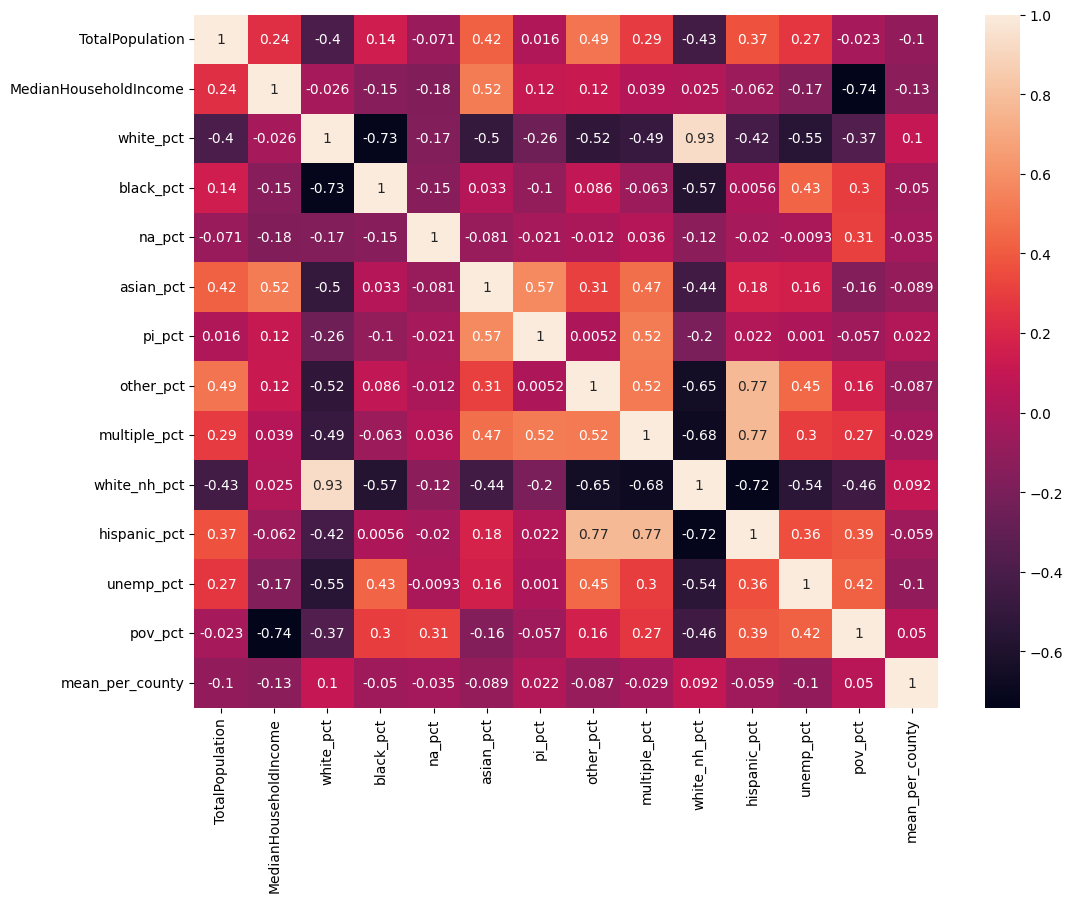

In [ ]:
#merging census + sulfur dioxide
census_sd = pd.merge(census_data_pct, sd_data, on = ['StateCode', 'CountyCode'], how = 'left')
census_sd_drop = census_sd.dropna()

#checking correlation
plt.figure(figsize=(12,9))
sns.heatmap(census_sd_drop.corr(), annot=True)

**Formatting Data Frames**

In [ ]:
#changing name of each mean column of each pollutant
census_cm = census_cm.rename(columns={'mean_per_county':'mean_cm'})
census_nd = census_nd.rename(columns={'mean_per_county':'mean_nd'})
census_oz = census_oz.rename(columns={'mean_per_county':'mean_oz'})
census_pm = census_pm.rename(columns={'mean_per_county':'mean_pm'})
census_sd = census_sd.rename(columns={'mean_per_county':'mean_sd'})

In [ ]:
#merging all dataframes together
data1 = pd.merge(census_cm, census_nd[['StateCode', 'CountyCode','mean_nd']], on = ['StateCode', 'CountyCode'], how = 'left')
data2 = pd.merge(data1, census_oz[['StateCode', 'CountyCode','mean_oz']], on = ['StateCode', 'CountyCode'], how = 'left')
data3 = pd.merge(data2, census_pm[['StateCode', 'CountyCode','mean_pm']], on = ['StateCode', 'CountyCode'], how = 'left')
data = pd.merge(data3, census_sd[['StateCode', 'CountyCode','mean_sd']], on = ['StateCode', 'CountyCode'], how = 'left')
data

,StateCode,CountyCode,TotalPopulation,MedianHouseholdIncome,white_pct,black_pct,na_pct,asian_pct,pi_pct,other_pct,multiple_pct,white_nh_pct,hispanic_pct,unemp_pct,pov_pct,mean_cm,mean_nd,mean_oz,mean_pm,mean_sd
0,01,001,58239,62660,0.751301,0.196947,0.001683,0.011109,0.000000,0.003365,0.035595,0.730971,0.030478,0.012912,0.134738,NaN,NaN,NaN,NaN,NaN
1,01,003,227131,64346,0.845477,0.087593,0.005543,0.009576,0.000040,0.018329,0.033443,0.825726,0.046819,0.017585,0.090688,NaN,NaN,0.039457,7.317391,NaN
2,01,005,25259,36422,0.455085,0.474484,0.003048,0.004197,0.000040,0.038679,0.024467,0.446098,0.046558,0.031989,0.233184,NaN,NaN,NaN,NaN,NaN
3,01,007,22412,54277,0.759415,0.223229,0.000937,0.002052,0.000000,0.000937,0.013430,0.740496,0.028288,0.039443,0.158754,NaN,NaN,NaN,NaN,NaN
4,01,009,58884,52830,0.924513,0.012907,0.003210,0.003668,0.001257,0.021109,0.033337,0.859232,0.095306,0.026391,0.131105,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,72,145,54544,21507,0.562665,0.044166,0.000917,0.000165,0.000000,0.158551,0.233536,0.020002,0.977431,0.063838,0.431211,NaN,NaN,NaN,NaN,NaN
3217,72,147,8317,14942,0.311651,0.075628,0.000000,0.001683,0.000000,0.573043,0.037994,0.061200,0.921246,0.043044,0.532043,NaN,NaN,NaN,NaN,NaN
3218,72,149,22341,20722,0.470077,0.079853,0.000000,0.000000,0.000000,0.105233,0.344837,0.002328,0.996330,0.065530,0.442281,NaN,NaN,NaN,NaN,NaN
3219,72,151,31047,17267,0.102747,0.519181,0.000000,0.000354,0.000000,0.350726,0.026991,0.000870,0.998776,0.048507,0.526138,NaN,NaN,NaN,NaN,NaN


In [ ]:
#checking for null values
data.isna().sum()

StateCode                   0
CountyCode                  0
TotalPopulation             0
MedianHouseholdIncome       0
white_pct                   0
black_pct                   0
na_pct                      0
asian_pct                   0
pi_pct                      0
other_pct                   0
multiple_pct                0
white_nh_pct                0
hispanic_pct                0
unemp_pct                   0
pov_pct                     0
mean_cm                  3068
mean_nd                  2965
mean_oz                  2461
mean_pm                  2595
mean_sd                  2932
dtype: int64

**Using a KNN Imputer to Fill Missing Pollutant Values**

In [ ]:
#importing package needed
from sklearn.impute import KNNImputer

In [ ]:
#extracting state and county data
data_state_county = data[['StateCode','CountyCode']]

In [ ]:
#dropping state and county from old df
data = data.drop(['StateCode','CountyCode'], axis=1)

In [ ]:
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(data)
# transform the dataset
data_trans = imputer.transform(data)
df1 = pd.DataFrame(data_trans, columns = data.columns)

In [ ]:
data_state_county

,StateCode,CountyCode
0,01,001
1,01,003
2,01,005
3,01,007
4,01,009
...,...,...
3216,72,145
3217,72,147
3218,72,149
3219,72,151


In [ ]:
#merge transformed data with state and county values
df = pd.concat([data_state_county, df1], axis=1)
df

,StateCode,CountyCode,TotalPopulation,MedianHouseholdIncome,white_pct,black_pct,na_pct,asian_pct,pi_pct,other_pct,multiple_pct,white_nh_pct,hispanic_pct,unemp_pct,pov_pct,mean_cm,mean_nd,mean_oz,mean_pm,mean_sd
0,01,001,58239.0,62660.0,0.751301,0.196947,0.001683,0.011109,0.000000,0.003365,0.035595,0.730971,0.030478,0.012912,0.134738,0.155689,8.417710,0.040969,5.186036,0.692467
1,01,003,227131.0,64346.0,0.845477,0.087593,0.005543,0.009576,0.000040,0.018329,0.033443,0.825726,0.046819,0.017585,0.090688,0.224354,12.286745,0.039457,7.317391,0.497443
2,01,005,25259.0,36422.0,0.455085,0.474484,0.003048,0.004197,0.000040,0.038679,0.024467,0.446098,0.046558,0.031989,0.233184,0.150751,5.149285,0.039433,9.044536,4.575763
3,01,007,22412.0,54277.0,0.759415,0.223229,0.000937,0.002052,0.000000,0.000937,0.013430,0.740496,0.028288,0.039443,0.158754,0.150751,3.953221,0.040257,6.035118,1.226546
4,01,009,58884.0,52830.0,0.924513,0.012907,0.003210,0.003668,0.001257,0.021109,0.033337,0.859232,0.095306,0.026391,0.131105,0.145612,7.637111,0.039829,6.348048,1.004889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,72,145,54544.0,21507.0,0.562665,0.044166,0.000917,0.000165,0.000000,0.158551,0.233536,0.020002,0.977431,0.063838,0.431211,0.169305,6.660592,0.035718,5.663816,1.425313
3217,72,147,8317.0,14942.0,0.311651,0.075628,0.000000,0.001683,0.000000,0.573043,0.037994,0.061200,0.921246,0.043044,0.532043,0.150751,3.199881,0.042034,6.800944,0.230850
3218,72,149,22341.0,20722.0,0.470077,0.079853,0.000000,0.000000,0.000000,0.105233,0.344837,0.002328,0.996330,0.065530,0.442281,0.150751,4.189719,0.039401,7.018461,0.281124
3219,72,151,31047.0,17267.0,0.102747,0.519181,0.000000,0.000354,0.000000,0.350726,0.026991,0.000870,0.998776,0.048507,0.526138,0.150751,8.629692,0.038748,7.018461,0.312375


In [ ]:
#checking data types
df.dtypes

StateCode                 object
CountyCode                object
TotalPopulation          float64
MedianHouseholdIncome    float64
white_pct                float64
black_pct                float64
na_pct                   float64
asian_pct                float64
pi_pct                   float64
other_pct                float64
multiple_pct             float64
white_nh_pct             float64
hispanic_pct             float64
unemp_pct                float64
pov_pct                  float64
mean_cm                  float64
mean_nd                  float64
mean_oz                  float64
mean_pm                  float64
mean_sd                  float64
dtype: object

In [ ]:
#cross-checking null values
df.isna().sum()

StateCode                0
CountyCode               0
TotalPopulation          0
MedianHouseholdIncome    0
white_pct                0
black_pct                0
na_pct                   0
asian_pct                0
pi_pct                   0
other_pct                0
multiple_pct             0
white_nh_pct             0
hispanic_pct             0
unemp_pct                0
pov_pct                  0
mean_cm                  0
mean_nd                  0
mean_oz                  0
mean_pm                  0
mean_sd                  0
dtype: int64

In [ ]:
#extracting mean values of each pollutant
df_means = df[['StateCode','CountyCode','mean_cm','mean_nd','mean_oz','mean_pm','mean_sd']]

In [ ]:
#view dataframe
df_means

,StateCode,CountyCode,mean_cm,mean_nd,mean_oz,mean_pm,mean_sd
0,01,001,0.155689,8.417710,0.040969,5.186036,0.692467
1,01,003,0.224354,12.286745,0.039457,7.317391,0.497443
2,01,005,0.150751,5.149285,0.039433,9.044536,4.575763
3,01,007,0.150751,3.953221,0.040257,6.035118,1.226546
4,01,009,0.145612,7.637111,0.039829,6.348048,1.004889
...,...,...,...,...,...,...,...
3216,72,145,0.169305,6.660592,0.035718,5.663816,1.425313
3217,72,147,0.150751,3.199881,0.042034,6.800944,0.230850
3218,72,149,0.150751,4.189719,0.039401,7.018461,0.281124
3219,72,151,0.150751,8.629692,0.038748,7.018461,0.312375


**Using County Health Ranking Data**

In [ ]:
#pulling in County Health Rankings for Physical Environment
sql = '''
select *
from public.GroupI_CountyHealthData
'''

with engine.connect() as connection:
  county_health_rankings = pd.read_sql(text(sql), con=connection)

county_health_rankings

,Env_Rank,StateCode,CountyCode
0,59,01,001
1,27,01,003
2,66,01,005
3,51,01,007
4,44,01,009
...,...,...,...
3077,21,56,037
3078,11,56,039
3079,12,56,041
3080,5,56,043


In [ ]:
#renaming columns
county_health_rankings.rename(columns={'Env_Rank': 'Rank'}, inplace=True)

In [ ]:
#merging pollutant data with county health data
df_means_ranks = pd.merge(df_means, county_health_rankings, on =['StateCode','CountyCode'], how = 'left')
df_means_ranks

,StateCode,CountyCode,mean_cm,mean_nd,mean_oz,mean_pm,mean_sd,Rank
0,01,001,0.155689,8.417710,0.040969,5.186036,0.692467,59.0
1,01,003,0.224354,12.286745,0.039457,7.317391,0.497443,27.0
2,01,005,0.150751,5.149285,0.039433,9.044536,4.575763,66.0
3,01,007,0.150751,3.953221,0.040257,6.035118,1.226546,51.0
4,01,009,0.145612,7.637111,0.039829,6.348048,1.004889,44.0
...,...,...,...,...,...,...,...,...
3216,72,145,0.169305,6.660592,0.035718,5.663816,1.425313,NaN
3217,72,147,0.150751,3.199881,0.042034,6.800944,0.230850,NaN
3218,72,149,0.150751,4.189719,0.039401,7.018461,0.281124,NaN
3219,72,151,0.150751,8.629692,0.038748,7.018461,0.312375,NaN


In [ ]:
#dropping null values
df_means_ranks = df_means_ranks.dropna()
df_means_ranks

,StateCode,CountyCode,mean_cm,mean_nd,mean_oz,mean_pm,mean_sd,Rank
0,01,001,0.155689,8.417710,0.040969,5.186036,0.692467,59.0
1,01,003,0.224354,12.286745,0.039457,7.317391,0.497443,27.0
2,01,005,0.150751,5.149285,0.039433,9.044536,4.575763,66.0
3,01,007,0.150751,3.953221,0.040257,6.035118,1.226546,51.0
4,01,009,0.145612,7.637111,0.039829,6.348048,1.004889,44.0
...,...,...,...,...,...,...,...,...
3138,56,037,0.131456,4.708022,0.046896,4.349107,0.751646,21.0
3139,56,039,0.104890,2.530282,0.045669,3.363607,0.641209,11.0
3140,56,041,0.108485,7.402447,0.041678,5.540128,0.813352,12.0
3141,56,043,0.140164,3.098616,0.042150,5.200999,0.750396,5.0


In [ ]:
#convert Rank to numeric column
#to take care of 'NR' in some rows
df_means_ranks.Rank = pd.to_numeric(df_means_ranks.Rank, errors='coerce')
df_means_ranks.dtypes

<ipython-input-34-e9de5a97c337>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


StateCode      object
CountyCode     object
mean_cm       float64
mean_nd       float64
mean_oz       float64
mean_pm       float64
mean_sd       float64
Rank          float64
dtype: object

In [ ]:
#dropping null values again
df_means_ranks = df_means_ranks.dropna()

**Random Forest ML Model** - feature importances will change if ran

In [ ]:
#importing packages needed
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
#splitting data into X and Y
x = df_means_ranks[["mean_cm", "mean_nd", "mean_oz", "mean_pm", "mean_sd"]]
y = df_means_ranks["Rank"]

#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [ ]:
#hyper-parameter optimization
#choosing parameter ranges
param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

#running a randomized search
random_search = RandomizedSearchCV(RandomForestRegressor(), param_grid)

#extracting best fit estimator
random_search.fit(x_train, y_train)
print(random_search.best_estimator_)

RandomForestRegressor(max_depth=3, max_features='log2', max_leaf_nodes=9)


In [ ]:
#running the random forest regression
rf = RandomForestRegressor(max_depth=3, max_features='log2', max_leaf_nodes=9)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, max_features='log2', max_leaf_nodes=6,
                      n_estimators=10)

In [ ]:
#importing packages to measure accuracy
from sklearn.metrics import accuracy_score, mean_squared_error

In [ ]:
#predicting y values for test data
y_pred = rf.predict(x_test)

In [ ]:
#getting r^2 for test data
rf.score(x_test, y_test)

0.028867734108893206

In [ ]:
#getting MSE for test data
mse = mean_squared_error(y_test, y_pred)
print("Random Forest Regressor : MSE = {:0.2f}".format(mse))

Random Forest Regressor : MSE = 1545.67


In [ ]:
#extract feature importances
rf.feature_importances_
#these numbers may be different than the feature importances we use below
#because of the randomized search optimizer and test train split
#we just reran the random forest regressor

array([0.05773912, 0.45873225, 0.08978778, 0.31073609, 0.08300476])

**Air Pollution Valuation and Rankings**

In [ ]:
#feature importance from Random Forest
#from when we first ran the rf
feature_importance = [0.18116857, 0.26023883, 0.15044395, 0.33133856, 0.0768101]

In [ ]:
#weighted average equation
#to get air pollution valuation
df_means_ranks["Air Pollution Valuation"] = (df_means_ranks["mean_cm"]*feature_importance[0]) + (df_means_ranks["mean_nd"]*feature_importance[1]) + (df_means_ranks["mean_oz"]*feature_importance[2]) + (df_means_ranks["mean_pm"]*feature_importance[3]) + (df_means_ranks["mean_sd"]*feature_importance[4])

In [ ]:
#sorting air pollution valuation based on score
df_means_ranks = df_means_ranks.sort_values('Air Pollution Valuation', ascending= True)
df_means_ranks

,StateCode,CountyCode,mean_cm,mean_nd,mean_oz,mean_pm,mean_sd,Rank,Air Pollution Valuation
1330,27,031,0.121832,2.900861,0.042170,1.187879,0.938464,7.0,1.249006
2397,46,071,0.140164,0.417965,0.045590,3.355801,0.041484,10.0,1.256116
3137,56,035,0.108485,2.021060,0.047477,3.076519,0.864585,2.0,1.638533
1612,30,027,0.140164,1.477484,0.044887,3.811634,0.452689,27.0,1.714357
550,15,007,0.181360,3.369837,0.042861,2.292222,0.825836,1.0,1.739202
...,...,...,...,...,...,...,...,...,...
261,08,031,0.348455,27.122671,0.042604,6.773974,0.341057,54.0,9.398586
245,08,001,0.294770,25.578064,0.047751,7.950094,0.752759,59.0,9.408984
222,06,071,0.315271,23.793582,0.053020,10.149526,0.463429,57.0,9.655633
1794,34,039,0.405507,27.101102,0.043749,8.526512,0.640572,4.0,10.007171


In [ ]:
#creating a new variable to rank counties based on air pollution valuation
df_means_ranks['Air Pollution Ranking'] = df_means_ranks['Air Pollution Valuation'].rank()
df_means_ranks

,StateCode,CountyCode,mean_cm,mean_nd,mean_oz,mean_pm,mean_sd,Rank,Air Pollution Valuation,Air Pollution Ranking
1330,27,031,0.121832,2.900861,0.042170,1.187879,0.938464,7.0,1.249006,1.0
2397,46,071,0.140164,0.417965,0.045590,3.355801,0.041484,10.0,1.256116,2.0
3137,56,035,0.108485,2.021060,0.047477,3.076519,0.864585,2.0,1.638533,3.0
1612,30,027,0.140164,1.477484,0.044887,3.811634,0.452689,27.0,1.714357,4.0
550,15,007,0.181360,3.369837,0.042861,2.292222,0.825836,1.0,1.739202,5.0
...,...,...,...,...,...,...,...,...,...,...
261,08,031,0.348455,27.122671,0.042604,6.773974,0.341057,54.0,9.398586,3077.0
245,08,001,0.294770,25.578064,0.047751,7.950094,0.752759,59.0,9.408984,3078.0
222,06,071,0.315271,23.793582,0.053020,10.149526,0.463429,57.0,9.655633,3079.0
1794,34,039,0.405507,27.101102,0.043749,8.526512,0.640572,4.0,10.007171,3080.0


In [ ]:
#extracting county names from census data
sql = '''
SELECT StateCode, CountyCode, Name FROM public.GroupI_CensusData
'''

with engine.connect() as connection:
  county_name_df = pd.read_sql(text(sql), con=connection)

county_name_df

,StateCode,CountyCode,Name
0,01,001,"Autauga County, Alabama"
1,01,003,"Baldwin County, Alabama"
2,01,005,"Barbour County, Alabama"
3,01,007,"Bibb County, Alabama"
4,01,009,"Blount County, Alabama"
...,...,...,...
3216,72,145,"Vega Baja Municipio, Puerto Rico"
3217,72,147,"Vieques Municipio, Puerto Rico"
3218,72,149,"Villalba Municipio, Puerto Rico"
3219,72,151,"Yabucoa Municipio, Puerto Rico"


In [ ]:
#merging air pollution rank data with county names
val_table = pd.merge(df_means_ranks, county_name_df, on = ['StateCode', 'CountyCode'])
val_table = val_table.drop(columns = ["mean_cm", "mean_nd", "mean_oz", "mean_pm", "mean_sd", "Rank"])
val_table

,StateCode,CountyCode,Air Pollution Valuation,Air Pollution Ranking,Name
0,27,031,1.249006,1.0,"Cook County, Minnesota"
1,46,071,1.256116,2.0,"Jackson County, South Dakota"
2,56,035,1.638533,3.0,"Sublette County, Wyoming"
3,30,027,1.714357,4.0,"Fergus County, Montana"
4,15,007,1.739202,5.0,"Kauai County, Hawaii"
...,...,...,...,...,...
3076,08,031,9.398586,3077.0,"Denver County, Colorado"
3077,08,001,9.408984,3078.0,"Adams County, Colorado"
3078,06,071,9.655633,3079.0,"San Bernardino County, California"
3079,34,039,10.007171,3080.0,"Union County, New Jersey"


In [ ]:
#adding census variables to previous df
totaldf = pd.merge(val_table, df, on=['StateCode', 'CountyCode'], how='left')
totaldf

,StateCode,CountyCode,Air Pollution Valuation,Air Pollution Ranking,Name,TotalPopulation,MedianHouseholdIncome,white_pct,black_pct,na_pct,...,multiple_pct,white_nh_pct,hispanic_pct,unemp_pct,pov_pct,mean_cm,mean_nd,mean_oz,mean_pm,mean_sd
0,27,031,1.249006,1.0,"Cook County, Minnesota",5574.0,65045.0,0.855400,0.000359,0.079117,...,0.037675,0.848403,0.024937,0.009688,0.090599,0.121832,2.900861,0.042170,1.187879,0.938464
1,46,071,1.256116,2.0,"Jackson County, South Dakota",2868.0,25357.0,0.352510,0.003487,0.615411,...,0.024756,0.352510,0.004533,0.028940,0.430265,0.140164,0.417965,0.045590,3.355801,0.041484
2,56,035,1.638533,3.0,"Sublette County, Wyoming",8830.0,82342.0,0.960136,0.000113,0.002039,...,0.035674,0.900793,0.072593,0.027407,0.082673,0.108485,2.021060,0.047477,3.076519,0.864585
3,30,027,1.714357,4.0,"Fergus County, Montana",11464.0,52941.0,0.932746,0.006019,0.012299,...,0.019191,0.932048,0.008810,0.011514,0.140091,0.140164,1.477484,0.044887,3.811634,0.452689
4,15,007,1.739202,5.0,"Kauai County, Hawaii",73247.0,86287.0,0.316969,0.005243,0.003004,...,0.260256,0.292913,0.115855,0.022909,0.090352,0.181360,3.369837,0.042861,2.292222,0.825836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076,08,031,9.398586,3077.0,"Denver County, Colorado",706799.0,78177.0,0.688368,0.089678,0.008233,...,0.099359,0.539735,0.294350,0.027893,0.114064,0.348455,27.122671,0.042604,6.773974,0.341057
3077,08,001,9.408984,3078.0,"Adams County, Colorado",514969.0,78304.0,0.710179,0.034021,0.011488,...,0.123939,0.482567,0.409479,0.025044,0.095072,0.294770,25.578064,0.047751,7.950094,0.752759
3078,06,071,9.655633,3079.0,"San Bernardino County, California",2171071.0,70287.0,0.507228,0.080223,0.010765,...,0.124105,0.265803,0.545793,0.034751,0.139469,0.315271,23.793582,0.053020,10.149526,0.463429
3079,34,039,10.007171,3080.0,"Union County, New Jersey",571963.0,87369.0,0.482540,0.211332,0.003409,...,0.077342,0.383596,0.325161,0.034298,0.084586,0.405507,27.101102,0.043749,8.526512,0.640572


In [ ]:
#examining correlations
blackpopcorr = totaldf[['black_pct','Air Pollution Ranking']]
correlation = blackpopcorr.corr(method='pearson')
correlation

,black_pct,Air Pollution Ranking
black_pct,1.00000,0.21817
Air Pollution Ranking,0.21817,1.00000


In [ ]:
#examining correlations
totalpopcorr = totaldf[['TotalPopulation','Air Pollution Ranking']]
correlation1 = totalpopcorr.corr(method='pearson')
correlation1

,TotalPopulation,Air Pollution Ranking
TotalPopulation,1.000000,0.355518
Air Pollution Ranking,0.355518,1.000000


In [ ]:
#examining correlations
asianpopcorr = totaldf[['asian_pct','Air Pollution Ranking']]
correlation2 = asianpopcorr.corr(method='pearson')
correlation2

,asian_pct,Air Pollution Ranking
asian_pct,1.000000,0.257985
Air Pollution Ranking,0.257985,1.000000


In [ ]:
#examining correlations
hispanicpopcorr = totaldf[['hispanic_pct','Air Pollution Ranking']]
correlation3 = hispanicpopcorr.corr(method='pearson')
correlation3

,hispanic_pct,Air Pollution Ranking
hispanic_pct,1.000000,0.069545
Air Pollution Ranking,0.069545,1.000000


In [ ]:
#examining correlations
medhouseholdcorr = totaldf[['MedianHouseholdIncome','Air Pollution Ranking']]
correlation4 = medhouseholdcorr.corr(method='pearson')
correlation4

,MedianHouseholdIncome,Air Pollution Ranking
MedianHouseholdIncome,1.000000,0.053523
Air Pollution Ranking,0.053523,1.000000


In [ ]:
#examining correlations
unempcorr = totaldf[['unemp_pct','Air Pollution Ranking']]
correlation5 = unempcorr.corr(method='pearson')
correlation5

,unemp_pct,Air Pollution Ranking
unemp_pct,1.000000,0.232026
Air Pollution Ranking,0.232026,1.000000


In [ ]:
#examining correlations
povertycorr = totaldf[['pov_pct','Air Pollution Ranking']]
correlation6 = povertycorr.corr(method='pearson')
correlation6

,pov_pct,Air Pollution Ranking
pov_pct,1.000000,0.121191
Air Pollution Ranking,0.121191,1.000000


In [ ]:
#examining correlations
whitecorr = totaldf[['white_pct','Air Pollution Ranking']]
correlation7 = whitecorr.corr(method='pearson')
correlation7

,white_pct,Air Pollution Ranking
white_pct,1.000000,-0.232081
Air Pollution Ranking,-0.232081,1.000000


**Making The Map**

In [ ]:
#saving shapefiles of states and counties
shapefiles_zipcodes = "http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_zcta510_500k.zip"
shapefiles_counties = "http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_county_500k.zip"
shapefiles_states   = "http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_500k.zip"

In [ ]:
#using geopandas to convert shapefiles to a df
df_states = gpd.read_file(shapefiles_states)
df_counties = gpd.read_file(shapefiles_counties)

In [ ]:
#removing non continental US states
df_states = df_states[ df_states.NAME!='Alaska' ]
df_states = df_states[ df_states.NAME!='Hawaii' ]
df_states = df_states[ df_states.NAME!='Puerto Rico' ]
df_states = df_states[ df_states.NAME!='Guam' ]
df_states = df_states[ df_states.NAME!='Commonwealth of the Northern Mariana Islands' ]
df_states = df_states[ df_states.NAME!='American Samoa' ]
df_states = df_states[ df_states.NAME!='United States Virgin Islands' ]

In [ ]:
#only choosing counties from continental US states
keep_county = df_counties.STATEFP.isin(df_states.STATEFP.values)
df_counties = df_counties[ keep_county ]

In [ ]:
#viewing first five rows from counties data
df_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,01,005,00161528,0500000US01005,01005,Barbour,06,2292144656,50538698,"POLYGON ((-85.74803 31.61918, -85.74544 31.618..."
1,01,023,00161537,0500000US01023,01023,Choctaw,06,2365869837,19144469,"POLYGON ((-88.47323 31.89386, -88.46888 31.930..."
2,01,035,00161543,0500000US01035,01035,Conecuh,06,2201948618,6643480,"POLYGON ((-87.42720 31.26436, -87.42551 31.268..."
3,01,051,00161551,0500000US01051,01051,Elmore,06,1601762124,99965171,"POLYGON ((-86.41333 32.75059, -86.37115 32.750..."
4,01,065,00161558,0500000US01065,01065,Hale,06,1667907107,32423356,"POLYGON ((-87.87046 32.76244, -87.86818 32.765..."


In [ ]:
#Change the graph defaults
plt.rcParams['figure.figsize'] = (8, 3)  #Default figure size of 6x2 inches
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'lightgray'
plt.rcParams['font.size'] = 10  #Default font size of 12 points
plt.rcParams['lines.linewidth'] = 1  #Default line width of 1 points
plt.rcParams['lines.markersize'] = 3  #Default marker size of 3 points
plt.rcParams['legend.fontsize'] = 10  #Default legend font size of 10 poin

In [ ]:
#merging air pollution data with geodata
gdf = pd.merge(
    left = df_counties, #The geodataframe with the county shapes
    right = totaldf, #air pollution and census data for all counties
    left_on=['STATEFP', 'COUNTYFP'],
    right_on=['StateCode', 'CountyCode']
).filter( ['Name','GEOID','geometry', 'TotalPopulation', 'MedianHouseholdIncome','unemp_pct','pov_pct', 'white_pct', 'black_pct', 'asian_pct', 'hispanic_pct', 'Air Pollution Ranking'])

gdf.rename(columns= {'TotalPopulation' : 'Total Population' , 'MedianHouseholdIncome': 'Median Household Income', 'white_pct' : 'White Population Percentage', 'black_pct' : 'Black Population Percentage', 'asian_pct': 'Asian Population Percentage', 'hispanic_pct': 'Hispanic Population Percentage', 'unemp_pct': 'Unemployment Rate', 'pov_pct': 'Poverty Rate'}, inplace=True)

In [ ]:
#converting decimals to percentages
gdf['White Population Percentage'] = gdf['White Population Percentage']*100
gdf['Black Population Percentage'] = gdf['Black Population Percentage']*100
gdf['Asian Population Percentage'] = gdf['Asian Population Percentage']*100
gdf['Hispanic Population Percentage'] = gdf['Hispanic Population Percentage']*100
gdf['Unemployment Rate'] = gdf['Unemployment Rate']*100
gdf['Poverty Rate'] = gdf['Poverty Rate']*100

In [ ]:
#rounding percentages to integers
gdf['White Population Percentage'] = round(gdf['White Population Percentage'], 0).astype(int)
gdf['Black Population Percentage'] = round(gdf['Black Population Percentage'], 0).astype(int)
gdf['Asian Population Percentage'] =  round(gdf['Asian Population Percentage'], 0).astype(int)
gdf['Hispanic Population Percentage'] = round(gdf['Hispanic Population Percentage'], 0).astype(int)
gdf['Unemployment Rate'] = round(gdf['Unemployment Rate'], 2).astype(int)
gdf['Poverty Rate'] = round(gdf['Poverty Rate'], 2).astype(int)
gdf['Air Pollution Ranking'] = gdf['Air Pollution Ranking'].astype(int)

In [ ]:
#formatting percentages to string
gdf['White Population Percentage'] = gdf['White Population Percentage'].astype(str)+ '%'
gdf['Black Population Percentage'] = gdf['Black Population Percentage'].astype(str)+ '%'
gdf['Asian Population Percentage'] =  gdf['Asian Population Percentage'].astype(str)+ '%'
gdf['Hispanic Population Percentage'] = gdf['Hispanic Population Percentage'].astype(str)+ '%'
gdf['Unemployment Rate'] = gdf['Unemployment Rate'].astype(str)+ '%'
gdf['Poverty Rate'] = gdf['Poverty Rate'].astype(str) + '%'

In [ ]:
#adding '$' sign and ',' formatting
gdf["Median Household Income"] = gdf["Median Household Income"].map('${:,.0f}'.format)
gdf["Total Population"] = gdf["Total Population"].map('{:,.0f}'.format)

In [ ]:
#checking data types
gdf.dtypes

Name                                object
GEOID                               object
geometry                          geometry
Total Population                    object
Median Household Income             object
Unemployment Rate                   object
Poverty Rate                        object
White Population Percentage         object
Black Population Percentage         object
Asian Population Percentage         object
Hispanic Population Percentage      object
Air Pollution Ranking                int64
dtype: object

In [ ]:
#converting air pollution rankings to grade
#splitting counties into quintiles
gdf['Air Pollution Grade'] = pd.qcut(gdf['Air Pollution Ranking'], 5, labels = False)

In [ ]:
#converting numeric grades to letter
gdf['Air Pollution Grade'].replace([0,1,2,3,4], ['A', 'B', 'C', 'D', 'F'],inplace=True)

**Choropleth on Folium**

In [ ]:
!pip install -U -q geopandas tdqm folium mapclassify folium

import folium
from folium import plugins
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import requests

#setting backend parameters to make map more clear
%config InlineBackend.figure_format = 'retina'

In [ ]:
#extract geometries of counties from geodata
geometries = gdf.filter(['GEOID', 'geometry']).set_index('GEOID').to_json()

In [ ]:
#create new column for air pollution ranking to put on map
column_to_copy = 'Air Pollution Ranking'

#make a copy of the column and rename it
new_column_name = 'Air Pollution Rank'
gdf[new_column_name] = gdf[column_to_copy].copy()

#string format of Air Pollution Ranks for display on map
gdf['Air Pollution Rank'] = gdf['Air Pollution Rank'].map('{:,.0f}'.format).astype(str)

In [ ]:
#filter other columns out and save in df
air = gdf.filter(['Name','GEOID', 'Total Population','Median Household Income','Unemployment Rate','Poverty Rate','White Population Percentage',
'Black Population Percentage','Asian Population Percentage','Hispanic Population Percentage','Air Pollution Ranking','Air Pollution Rank','Air Pollution Grade'])
air['Air Pollution Ranking'] = air['Air Pollution Ranking'].astype(int)
air

,Name,GEOID,Total Population,Median Household Income,Unemployment Rate,Poverty Rate,White Population Percentage,Black Population Percentage,Asian Population Percentage,Hispanic Population Percentage,Air Pollution Ranking,Air Pollution Rank,Air Pollution Grade
0,"Barbour County, Alabama",01005,"25,259","$36,422",3%,23%,46%,47%,0%,5%,2512,"2,512",F
1,"Choctaw County, Alabama",01023,"12,792","$38,581",2%,21%,57%,41%,0%,1%,1224,"1,224",B
2,"Conecuh County, Alabama",01035,"11,778","$37,986",1%,12%,50%,48%,0%,0%,1471,"1,471",C
3,"Elmore County, Alabama",01051,"87,146","$67,597",2%,9%,75%,21%,1%,3%,2534,"2,534",F
4,"Hale County, Alabama",01065,"14,819","$32,294",2%,24%,38%,59%,0%,0%,1369,"1,369",C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3049,"Franklin County, North Carolina",37069,"67,598","$62,332",3%,11%,66%,24%,1%,9%,2419,"2,419",D
3050,"Martin County, Texas",48317,"5,213","$69,194",2%,13%,84%,1%,0%,46%,147,147,A
3051,"Wood County, West Virginia",54107,"84,678","$50,231",2%,14%,96%,1%,0%,1%,2668,"2,668",F
3052,"Taylor County, Georgia",13269,"7,857","$36,293",2%,28%,58%,40%,0%,1%,615,615,A


In [ ]:
#changing index to GEOID for easy identification
gdf_indexed = gdf.set_index('GEOID')

In [ ]:
#checking data types
air.dtypes

Name                              object
GEOID                             object
Total Population                  object
Median Household Income           object
Unemployment Rate                 object
Poverty Rate                      object
White Population Percentage       object
Black Population Percentage       object
Asian Population Percentage       object
Hispanic Population Percentage    object
Air Pollution Ranking              int64
Air Pollution Rank                object
Air Pollution Grade               object
dtype: object

In [ ]:
#manually computed and set bins to decimals
#to prevent threshold issues/color inconsistencies with pandas qcut
bins = [1.0, 628.1, 1242.2, 1856.8000000000002, 2469.4, 3081.0]

In [ ]:
#FOLIUM MAP CODE
#setting folium map with no tiles centered to the US
f = folium.Map(location=[38, -96.3], zoom_start=4.5, tiles=None)

#defining a choropleth map
cp = folium.Choropleth(geo_data=geometries, #geo data for counties
                data=air, #air pollution and census data
                name='All Air Pollution Grades', #base layer with all county grades
                columns=['GEOID', 'Air Pollution Ranking'],
                key_on='feature.id',
                fill_color='RdYlGn_r', #reverse red to green color scheme
                fill_opacity=0.8,
                line_opacity=0.2,
                legend_name='Air Pollution Ranking',
                nan_fill_color = 'White',
                nan_fill_opacity = 0.25,
                highlight=True,
                bins=bins #cut data based on bins above
).add_to(f) #adding choropleth layer to base map

#adding a search bar to look up places on the map
plugins.Geocoder().add_to(f)

#choosing light and dark mode tiles to enhance user experience
folium.TileLayer('cartodbdark_matter',name="Dark Mode",control=True).add_to(f)
folium.TileLayer('cartodbpositron',name="Light Mode",control=True).add_to(f)

#defining layers for each grade

#defining choropleth map for 'A' counties
agrade= ['A']
filtered_air = air[air['Air Pollution Grade'].isin(agrade)]
agrades = folium.Choropleth(
    geo_data=geometries,
    data=filtered_air,
    name='A',
    columns=['GEOID', 'Air Pollution Ranking'],
    key_on='feature.id',
    fill_color='RdYlGn_r',
    fill_opacity=0.8,
    line_opacity=0.2,
    nan_fill_color='White',
    nan_fill_opacity=0.25,
    highlight=True,
    bins=bins,
    show=False
)

#delete legend for 'A' counties
for key in agrades._children:
  if key.startswith('color_map'):
    del(agrades._children[key])

#adding choropleth layer to base map
agrades.add_to(f)

#defining choropleth map for 'B' counties
bgrade= ['B']
bfiltered_air = air[air['Air Pollution Grade'].isin(bgrade)]
bgrades = folium.Choropleth(
    geo_data=geometries,
    data=bfiltered_air,
    name='B',
    columns=['GEOID', 'Air Pollution Ranking'],
    key_on='feature.id',
    fill_color='RdYlGn_r',
    fill_opacity=0.8,
    line_opacity=0.2,
    nan_fill_color='White',
    nan_fill_opacity=0.25,
    highlight=True,
    bins=bins,
    show=False
)

#delete legend for 'B' counties
for key in bgrades._children:
  if key.startswith('color_map'):
    del(bgrades._children[key])

#adding choropleth layer to base map
bgrades.add_to(f)

#defining choropleth map for 'C' counties
cgrade= ['C']
cfiltered_air = air[air['Air Pollution Grade'].isin(cgrade)]
cgrades = folium.Choropleth(
    geo_data=geometries,
    data=cfiltered_air,
    name='C',
    columns=['GEOID', 'Air Pollution Ranking'],
    key_on='feature.id',
    fill_color='RdYlGn_r',
    fill_opacity=0.8,
    line_opacity=0.2,
    nan_fill_color='White',
    nan_fill_opacity=0.25,
    highlight=True,
    bins=bins,
    show=False
)

#delete legend for 'C' counties
for key in cgrades._children:
  if key.startswith('color_map'):
    del(cgrades._children[key])

#adding choropleth layer to base map
cgrades.add_to(f)

#defining choropleth map for 'D' counties
dgrade= ['D']
dfiltered_air = air[air['Air Pollution Grade'].isin(dgrade)]
dgrades = folium.Choropleth(
    geo_data=geometries,
    data=dfiltered_air,
    name='D',
    columns=['GEOID', 'Air Pollution Ranking'],
    key_on='feature.id',
    fill_color='RdYlGn_r',
    fill_opacity=0.8,
    line_opacity=0.2,
    nan_fill_color='White',
    nan_fill_opacity=0.25,
    highlight=True,
    bins=bins,
    show=False
)

#delete legend for 'D' counties
for key in dgrades._children:
  if key.startswith('color_map'):
    del(dgrades._children[key])

#adding choropleth layer to base map
dgrades.add_to(f)

#defining choropleth map for 'F' counties
fgrade= ['F']
ffiltered_air = air[air['Air Pollution Grade'].isin(fgrade)]
fgrades = folium.Choropleth(
    geo_data=geometries,
    data=ffiltered_air,
    name='F',
    columns=['GEOID', 'Air Pollution Ranking'],
    key_on='feature.id',
    fill_color='RdYlGn_r',
    fill_opacity=0.8,
    line_opacity=0.2,
    nan_fill_color='White',
    nan_fill_opacity=0.25,
    highlight=True,
    bins=bins,
    show=False
)

#delete legend for 'F' counties
for key in fgrades._children:
  if key.startswith('color_map'):
    del(fgrades._children[key])

#adding choropleth layer to base map
fgrades.add_to(f)

#tooltip for base map
for s in cp.geojson.data['features']:
      s['properties']['Name'] = gdf_indexed.loc[s['id'], 'Name']
      s['properties']['Air Pollution Grade'] = gdf_indexed.loc[s['id'], 'Air Pollution Grade']
      s['properties']['Air Pollution Rank'] = gdf_indexed.loc[s['id'], 'Air Pollution Rank']
      s['properties']['Total Population'] = gdf_indexed.loc[s['id'], 'Total Population']
      s['properties']['Median Household Income'] = gdf_indexed.loc[s['id'], 'Median Household Income']
      s['properties']['Poverty Rate'] = gdf_indexed.loc[s['id'], 'Poverty Rate']
      s['properties']['Unemployment Rate'] = gdf_indexed.loc[s['id'], 'Unemployment Rate']
      s['properties']['White Population %'] = gdf_indexed.loc[s['id'], 'White Population Percentage']
      s['properties']['Black Population %'] = gdf_indexed.loc[s['id'], 'Black Population Percentage']
      s['properties']['Asian Population %'] = gdf_indexed.loc[s['id'], 'Asian Population Percentage']
      s['properties']['Hispanic Population %'] = gdf_indexed.loc[s['id'], 'Hispanic Population Percentage']

#adding tooltip for layer with all counties to base map
folium.GeoJsonTooltip(['Name', 'Air Pollution Grade', 'Air Pollution Rank', 'Median Household Income', 'Poverty Rate', 'Unemployment Rate', 'Total Population',
                      'White Population %', 'Black Population %', 'Asian Population %', 'Hispanic Population %']).add_to(cp.geojson)

#tooltip for 'A' counties
for s in agrades.geojson.data['features']:
      s['properties']['Name'] = gdf_indexed.loc[s['id'], 'Name']
      s['properties']['Air Pollution Grade'] = gdf_indexed.loc[s['id'], 'Air Pollution Grade']
      s['properties']['Air Pollution Rank'] = gdf_indexed.loc[s['id'], 'Air Pollution Rank']
      s['properties']['Median Household Income'] = gdf_indexed.loc[s['id'], 'Median Household Income']
      s['properties']['Poverty Rate'] = gdf_indexed.loc[s['id'], 'Poverty Rate']
      s['properties']['Unemployment Rate'] = gdf_indexed.loc[s['id'], 'Unemployment Rate']
      s['properties']['Total Population'] = gdf_indexed.loc[s['id'], 'Total Population']
      s['properties']['White Population %'] = gdf_indexed.loc[s['id'], 'White Population Percentage']
      s['properties']['Black Population %'] = gdf_indexed.loc[s['id'], 'Black Population Percentage']
      s['properties']['Asian Population %'] = gdf_indexed.loc[s['id'], 'Asian Population Percentage']
      s['properties']['Hispanic Population %'] = gdf_indexed.loc[s['id'], 'Hispanic Population Percentage']

#adding tooltip for 'A' layer to base map
folium.GeoJsonTooltip(['Name', 'Air Pollution Grade', 'Air Pollution Rank', 'Median Household Income', 'Poverty Rate', 'Unemployment Rate', 'Total Population',
                      'White Population %', 'Black Population %', 'Asian Population %', 'Hispanic Population %']).add_to(agrades.geojson)

#tooltip for 'B' counties
for s in bgrades.geojson.data['features']:
      s['properties']['Name'] = gdf_indexed.loc[s['id'], 'Name']
      s['properties']['Air Pollution Grade'] = gdf_indexed.loc[s['id'], 'Air Pollution Grade']
      s['properties']['Air Pollution Rank'] = gdf_indexed.loc[s['id'], 'Air Pollution Rank']
      s['properties']['Median Household Income'] = gdf_indexed.loc[s['id'], 'Median Household Income']
      s['properties']['Poverty Rate'] = gdf_indexed.loc[s['id'], 'Poverty Rate']
      s['properties']['Unemployment Rate'] = gdf_indexed.loc[s['id'], 'Unemployment Rate']
      s['properties']['Total Population'] = gdf_indexed.loc[s['id'], 'Total Population']
      s['properties']['White Population %'] = gdf_indexed.loc[s['id'], 'White Population Percentage']
      s['properties']['Black Population %'] = gdf_indexed.loc[s['id'], 'Black Population Percentage']
      s['properties']['Asian Population %'] = gdf_indexed.loc[s['id'], 'Asian Population Percentage']
      s['properties']['Hispanic Population %'] = gdf_indexed.loc[s['id'], 'Hispanic Population Percentage']

#adding tooltip for 'B' layer to base map
folium.GeoJsonTooltip(['Name', 'Air Pollution Grade', 'Air Pollution Rank', 'Median Household Income', 'Poverty Rate', 'Unemployment Rate', 'Total Population',
                      'White Population %', 'Black Population %', 'Asian Population %', 'Hispanic Population %']).add_to(bgrades.geojson)

#tooltip for 'C' counties
for s in cgrades.geojson.data['features']:
      s['properties']['Name'] = gdf_indexed.loc[s['id'], 'Name']
      s['properties']['Air Pollution Grade'] = gdf_indexed.loc[s['id'], 'Air Pollution Grade']
      s['properties']['Air Pollution Rank'] = gdf_indexed.loc[s['id'], 'Air Pollution Rank']
      s['properties']['Median Household Income'] = gdf_indexed.loc[s['id'], 'Median Household Income']
      s['properties']['Poverty Rate'] = gdf_indexed.loc[s['id'], 'Poverty Rate']
      s['properties']['Unemployment Rate'] = gdf_indexed.loc[s['id'], 'Unemployment Rate']
      s['properties']['Total Population'] = gdf_indexed.loc[s['id'], 'Total Population']
      s['properties']['White Population %'] = gdf_indexed.loc[s['id'], 'White Population Percentage']
      s['properties']['Black Population %'] = gdf_indexed.loc[s['id'], 'Black Population Percentage']
      s['properties']['Asian Population %'] = gdf_indexed.loc[s['id'], 'Asian Population Percentage']
      s['properties']['Hispanic Population %'] = gdf_indexed.loc[s['id'], 'Hispanic Population Percentage']

#adding tooltip for 'C' layer to base map
folium.GeoJsonTooltip(['Name', 'Air Pollution Grade', 'Air Pollution Rank', 'Median Household Income', 'Poverty Rate', 'Unemployment Rate', 'Total Population',
                      'White Population %', 'Black Population %', 'Asian Population %', 'Hispanic Population %']).add_to(cgrades.geojson)

#tooltip for 'D' counties
for s in dgrades.geojson.data['features']:
      s['properties']['Name'] = gdf_indexed.loc[s['id'], 'Name']
      s['properties']['Air Pollution Grade'] = gdf_indexed.loc[s['id'], 'Air Pollution Grade']
      s['properties']['Air Pollution Rank'] = gdf_indexed.loc[s['id'], 'Air Pollution Rank']
      s['properties']['Median Household Income'] = gdf_indexed.loc[s['id'], 'Median Household Income']
      s['properties']['Poverty Rate'] = gdf_indexed.loc[s['id'], 'Poverty Rate']
      s['properties']['Unemployment Rate'] = gdf_indexed.loc[s['id'], 'Unemployment Rate']
      s['properties']['Total Population'] = gdf_indexed.loc[s['id'], 'Total Population']
      s['properties']['White Population %'] = gdf_indexed.loc[s['id'], 'White Population Percentage']
      s['properties']['Black Population %'] = gdf_indexed.loc[s['id'], 'Black Population Percentage']
      s['properties']['Asian Population %'] = gdf_indexed.loc[s['id'], 'Asian Population Percentage']
      s['properties']['Hispanic Population %'] = gdf_indexed.loc[s['id'], 'Hispanic Population Percentage']

#adding tooltip for 'D' layer to base map
folium.GeoJsonTooltip(['Name', 'Air Pollution Grade', 'Air Pollution Rank', 'Median Household Income', 'Poverty Rate', 'Unemployment Rate', 'Total Population',
                      'White Population %', 'Black Population %', 'Asian Population %', 'Hispanic Population %']).add_to(dgrades.geojson)

#tooltip for 'F' counties
for s in fgrades.geojson.data['features']:
      s['properties']['Name'] = gdf_indexed.loc[s['id'], 'Name']
      s['properties']['Air Pollution Grade'] = gdf_indexed.loc[s['id'], 'Air Pollution Grade']
      s['properties']['Air Pollution Rank'] = gdf_indexed.loc[s['id'], 'Air Pollution Rank']
      s['properties']['Median Household Income'] = gdf_indexed.loc[s['id'], 'Median Household Income']
      s['properties']['Poverty Rate'] = gdf_indexed.loc[s['id'], 'Poverty Rate']
      s['properties']['Unemployment Rate'] = gdf_indexed.loc[s['id'], 'Unemployment Rate']
      s['properties']['Total Population'] = gdf_indexed.loc[s['id'], 'Total Population']
      s['properties']['White Population %'] = gdf_indexed.loc[s['id'], 'White Population Percentage']
      s['properties']['Black Population %'] = gdf_indexed.loc[s['id'], 'Black Population Percentage']
      s['properties']['Asian Population %'] = gdf_indexed.loc[s['id'], 'Asian Population Percentage']
      s['properties']['Hispanic Population %'] = gdf_indexed.loc[s['id'], 'Hispanic Population Percentage']

#adding tooltip for 'F' layer to base map
folium.GeoJsonTooltip(['Name', 'Air Pollution Grade', 'Air Pollution Rank', 'Median Household Income', 'Poverty Rate', 'Unemployment Rate', 'Total Population',
                      'White Population %', 'Black Population %', 'Asian Population %', 'Hispanic Population %']).add_to(fgrades.geojson)

#adding all layers to base map with option to control layers
folium.LayerControl().add_to(f)

#displaying map
#might be too large to show here
f

**Saving map as an HTML file**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#saving map as an html file
#uncomment below line to save map

#f.save('finalmap.html')